In [4]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from torchvision.datasets import MNIST
import torchvision.transforms as tfs

In [6]:
data_tfs = tfs.Compose([
  tfs.ToTensor(),
  tfs.Normalize((0.5), (0.5))
])

In [7]:
# install for train and test
root = './'
train = MNIST(root, train=True,  transform=data_tfs, download=True)
test  = MNIST(root, train=False, transform=data_tfs, download=True)

In [8]:
print(f'Data size:\n\t train {len(train)},\n\t test {len(test)}')
print(f'Data shape:\n\t features {train[0][0].shape},\n\t target {type(test[0][1])}')

Data size:
	 train 60000,
	 test 10000
Data shape:
	 features torch.Size([1, 28, 28]),
	 target <class 'int'>


In [9]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [10]:
features = 784
classes = 10

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [15]:
model = nn.Sequential(
  nn.Linear(features, 128),
  nn.ReLU(),
  nn.Linear(128, classes)
)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
criterion = nn.CrossEntropyLoss()      # (logsoftmax + negative likelihood) в своей основе применительно к логитам (logits)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [17]:
epochs = 20
history = []
for i in range(epochs):
    for x_batch, y_batch in train_loader:
    # 1. # загружаем батч данных (вытянутый в линию)
        x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
        y_batch = y_batch.to(device)

    # 2. вычисляем скор с помощью прямого распространения ( .forward or .__call__ )
    logits = model(x_batch)

    # 3. вычислеяем - функцию потерь (loss)
    loss = criterion(logits, y_batch)
    history.append(loss.item())

    # 4. вычисляем градиенты
    optimizer.zero_grad()
    loss.backward()

    # 5. шаг градиентного спуска
    optimizer.step()

    print(f'{i+1},\t loss: {history[-1]}')

1,	 loss: 2.3083033561706543
2,	 loss: 2.0829856395721436
3,	 loss: 1.9029276371002197
4,	 loss: 1.742306113243103
5,	 loss: 1.5808409452438354
6,	 loss: 1.4271422624588013
7,	 loss: 1.281326174736023
8,	 loss: 1.142895221710205
9,	 loss: 1.0157957077026367
10,	 loss: 0.8990402817726135
11,	 loss: 0.7921918630599976
12,	 loss: 0.6955201625823975
13,	 loss: 0.609023928642273
14,	 loss: 0.5324307680130005
15,	 loss: 0.4645531475543976
16,	 loss: 0.4050982594490051
17,	 loss: 0.3531365692615509
18,	 loss: 0.30756279826164246
19,	 loss: 0.2682133615016937
20,	 loss: 0.23441964387893677


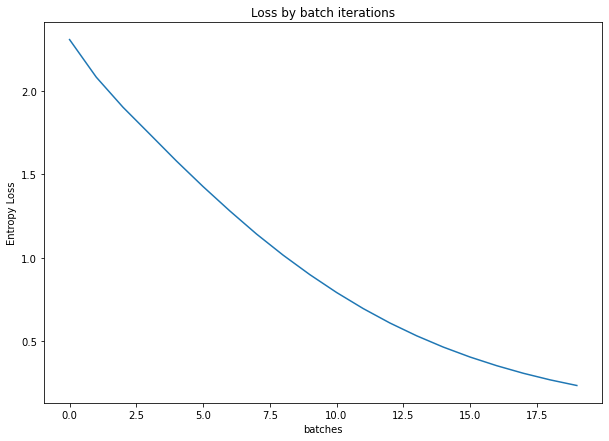

In [18]:
import matplotlib.pyplot as plt
     
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

In [134]:
class Net(torch.nn.Module):
    def __init__(self, features, n_hidden_neurons):
        super(Net, self).__init__()
        
        self.fc1 = torch.nn.Linear(features, 128)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(128, 128)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(128, 128)
        self.activ3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(128, 128)
        self.activ4 = torch.nn.Sigmoid()
        self.fc5 = torch.nn.Linear(128, classes)
        #self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        x = self.activ3(x)
        x = self.fc4(x)
        x = self.activ4(x)
        x = self.fc5(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        #x = self.sm(x)
        return x
    
net = Net(features, 64)

In [135]:
criterion_2 = nn.CrossEntropyLoss()      # (logsoftmax + negative likelihood) в своей основе применительно к логитам (logits)
optimizer_2 = torch.optim.Adam(net.parameters(), lr=1e-3)

In [136]:
epochs = 10
history = []
for i in range(epochs):
    for x_batch, y_batch in train_loader:
    # 1. # загружаем батч данных (вытянутый в линию)
        x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
        y_batch = y_batch.to(device)

    # 2. вычисляем скор с помощью прямого распространения ( .forward or .__call__ )
    logits_2 = net(x_batch)

    # 3. вычислеяем - функцию потерь (loss)
    loss = criterion_2(logits_2, y_batch)
    history.append(loss.item())

    # 4. вычисляем градиенты
    optimizer_2.zero_grad()
    loss.backward()

    # 5. шаг градиентного спуска
    optimizer_2.step()

    print(f'{i+1},\t loss: {history[-1]}')

1,	 loss: 2.354414224624634
2,	 loss: 2.331404209136963
3,	 loss: 2.314737558364868
4,	 loss: 2.3032517433166504
5,	 loss: 2.296532154083252
6,	 loss: 2.29418683052063
7,	 loss: 2.2952284812927246
8,	 loss: 2.297921895980835
9,	 loss: 2.300355911254883
10,	 loss: 2.3013956546783447


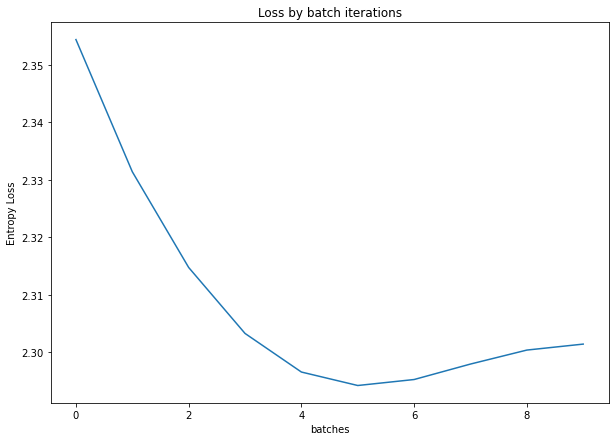

In [137]:
import matplotlib.pyplot as plt
     
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

Выводы: для хороших результатов на данном датасете достаточно 3х слоев  nn.Linear,nn.ReLU,nn.Linear - модель №1. При добавлении же "лишних" слоев Sigmoid и количества нейронов наблюдается переобучение нейросети, что мы можем видеть
по возрастанию Loss by batch iterations - модель №2.